<a href="https://colab.research.google.com/github/AshleshNayak/naive-bayes/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neurokit2 joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib

In [ ]:
# Load merged CSV file instead of WESAD.pkl
df = pd.read_csv("merged_file_all_test.csv")

print("\n--- Dataset Loaded ---")
print(f"Shape: {df.shape}")
print(df.head())


--- Dataset Loaded ---
Shape: (1436, 20)
   HRV_MeanNN    HRV_SDNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  HRV_CVSD  \
0  704.390244   72.383185  51.700669  52.356854  0.102760  0.073398   
1  781.351351  105.003480  78.436031  79.316188  0.134387  0.100385   
2  814.285714   77.934777  57.321674  58.181061  0.095709  0.070395   
3  875.367965   55.925687  48.130218  48.822015  0.063888  0.054983   
4  841.554622   55.473860  54.611689  55.387019  0.065918  0.064894   

   HRV_MedianNN  HRV_MadNN  HRV_MCVNN   HRV_IQRNN  HRV_SDRMSSD  HRV_Prc20NN  \
0    684.285714     52.950   0.077380   82.857143     1.400043   651.428571   
1    782.857143    137.670   0.175856  184.285714     1.338715   688.857143   
2    814.285714     95.310   0.117047  119.285714     1.359604   745.714286   
3    882.857143     50.832   0.057577   62.857143     1.161966   834.285714   
4    855.714286     60.363   0.070541   84.285714     1.015787   789.428571   

   HRV_Prc80NN  HRV_pNN50  HRV_pNN20   HRV_MinNN   HRV_M

In [ ]:
# Replace infinities with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop columns that are completely NaN
df.dropna(axis=1, how='all', inplace=True)

# Map label values (1 = No Stress, 2 = Stress)
df["Label"] = df["Label"].map({1: "No Stress", 2: "Stress"})

# Remove rows where Label is NaN (from other classes like amusement, meditation etc.)
df.dropna(subset=["Label"], inplace=True)

# Impute remaining NaNs with median values
imputer = SimpleImputer(strategy="median")
X = df.drop("Label", axis=1)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

y = df["Label"]

print("\n--- Dataset Cleaned ---")
print(f"Final Shape: {X.shape}")
print(f"Remaining NaNs: {X.isna().sum().sum()}")
print(y.value_counts())  # Check class balance


--- Dataset Cleaned ---
Final Shape: (899, 19)
Remaining NaNs: 0
Label
No Stress    581
Stress       318
Name: count, dtype: int64


In [ ]:
print("\n--- TRAINING NAIVE BAYES MODEL ---")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Classification Report
print("\n--- Naive Bayes Classification Report ---")
print(classification_report(y_test, y_pred))


--- TRAINING NAIVE BAYES MODEL ---

--- Naive Bayes Classification Report ---
              precision    recall  f1-score   support

   No Stress       0.82      0.76      0.79       116
      Stress       0.62      0.70      0.66        64

    accuracy                           0.74       180
   macro avg       0.72      0.73      0.72       180
weighted avg       0.75      0.74      0.74       180



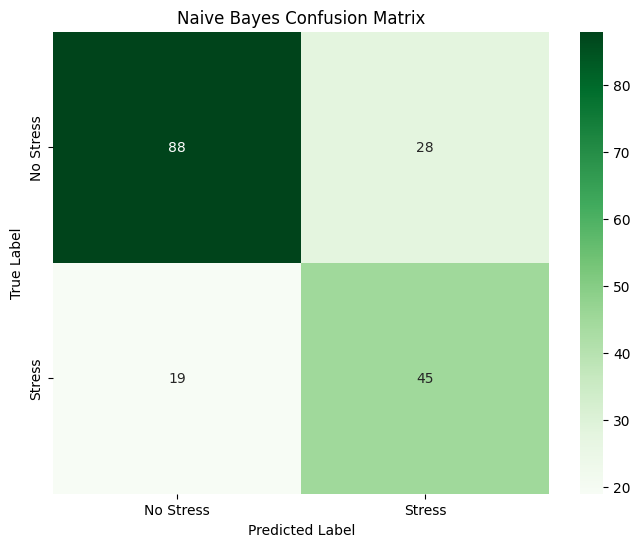

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=nb_classifier.classes_,
            yticklabels=nb_classifier.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import joblib

# Save model in the current working directory
joblib.dump(nb_classifier, "naive_bayes_model.joblib")

!ls -lh  # check if the file is created

total 452K
-rw-r--r-- 1 root root 440K Sep  5 05:16 merged_file_all_test.csv
-rw-r--r-- 1 root root 1.9K Sep  5 05:53 naive_bayes_model.joblib
-rw-r--r-- 1 root root 1.9K Sep  5 05:48 naive_bayes_model.pkl
drwxr-xr-x 1 root root 4.0K Sep  3 13:36 sample_data


In [ ]:
from google.colab import files
files.download("naive_bayes_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>